In [1]:
import pre
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
layer=0       #Change to 0 or 1 , 0 for layer 1 , 1 for layer 2

In [3]:
label=label=pre.create_label(layer)
corpus=pre.create_sentence_list(1)
from nltk.stem import SnowballStemmer
 
st = SnowballStemmer("english")
text = pre.norm_corpus
 
output = []
for sentence in text:
    output.append(" ".join([st.stem(i) for i in sentence.split()]))
fileid=pre.fileid
tv = TfidfVectorizer(min_df=0., max_df=1.,use_idf=True,lowercase=True,max_features=1500,ngram_range=(1,2),analyzer=u'word',smooth_idf=True)
tv_matrix = tv.fit_transform(output)
tv_matrix = tv_matrix.toarray()

print(len(tv_matrix))
print(label)
print(pre.norm_corpus)

13531
[['INT', 'PDI', 'MET'], ['RWK', 'DAT', 'MET'], ['RES'], ['RWK', 'MET'], ['RES', 'ANA'], ['MET', 'TNF'], ['RWK', 'MET'], ['INT', 'EXP', 'MET'], ['MET'], ['MET'], ['RWK', 'EXP', 'MET'], ['DAT', 'EXP', 'MET'], ['RES'], ['OAL'], ['MET'], ['MET'], ['MET', 'RES'], ['DAT', 'MET'], ['RWK'], ['MET'], ['MET'], ['EXT'], ['EXT'], ['OAL'], ['MET'], ['MET', 'RES'], ['RWK'], ['INT'], ['PDI'], ['EXP'], ['EXP'], ['MET'], ['DAT', 'RES'], ['RES'], ['RES'], ['EXT'], ['EXT'], ['DAT'], ['ANA'], ['ANA', 'OAL'], ['EXP'], ['MET'], ['EXP'], ['EXP'], ['MET'], ['EXP'], ['MET'], ['TNF'], ['TNF'], ['INT', 'MET'], ['INT', 'EXP', 'RES'], ['RWK', 'MET', 'RES'], ['INT', 'EXP', 'MET'], ['RWK'], ['RWK', 'MET'], ['RWK', 'MET'], ['RWK', 'EXP'], ['RWK', 'PDI', 'MET'], ['EXP', 'MET', 'OAL'], ['RWK', 'PDI', 'EXP', 'MET'], ['PDI', 'MET'], ['PDI'], ['MET'], ['DAT', 'EXP'], ['MET'], ['MET', 'RES'], ['MET'], ['OAL'], ['DAT', 'EXP', 'RES'], ['DAT'], ['INT'], ['PDI'], ['DAT', 'MET'], ['RWK'], ['MET'], ['MET'], ['MET'], ['MET'

In [4]:
new_label=[]
new_tv=[]
new_fileid=[]
new_corpus=[]
length = len(tv_matrix)
for i in range(0, length):
  for j in range(0,len(label[i])):
    new_tv.append(tv_matrix[i])
    new_label.append(label[i][j])
    new_fileid.append(fileid[i])
    new_corpus.append(text[i])
vocab = tv.get_feature_names()
df_tfidf=pre.pd.DataFrame(pre.np.round(new_tv, 10), columns=vocab)
#df_tfidf.insert(0, "sentences", corpus)
df_tfidf["tag"]=new_label
df_tfidf

abbrevi  abil  abl  abl learn  abl show  ...  your  zero  zhang  zuidema  tag
0          0.0   0.0  0.0        0.0       0.0  ...   0.0   0.0    0.0      0.0  INT
1          0.0   0.0  0.0        0.0       0.0  ...   0.0   0.0    0.0      0.0  PDI
2          0.0   0.0  0.0        0.0       0.0  ...   0.0   0.0    0.0      0.0  MET
3          0.0   0.0  0.0        0.0       0.0  ...   0.0   0.0    0.0      0.0  RWK
4          0.0   0.0  0.0        0.0       0.0  ...   0.0   0.0    0.0      0.0  DAT
...        ...   ...  ...        ...       ...  ...   ...   ...    ...      ...  ...
20180      0.0   0.0  0.0        0.0       0.0  ...   0.0   0.0    0.0      0.0  MET
20181      0.0   0.0  0.0        0.0       0.0  ...   0.0   0.0    0.0      0.0  OAL
20182      0.0   0.0  0.0        0.0       0.0  ...   0.0   0.0    0.0      0.0  RES
20183      0.0   0.0  0.0        0.0       0.0  ...   0.0   0.0    0.0      0.0  OAL
20184      0.0   0.0  0.0        0.0       0.0  ...   0.0   0.0    0.0      0.0  MET

[20185 rows x 5001 columns]

Creating X

In [5]:
import numpy as np
X_df=df_tfidf[df_tfidf.columns[0:-1]] #X dataframe
X=X_df.to_numpy()    # X in array
y=df_tfidf["tag"]
print(np.unique(df_tfidf["tag"]))
class_names=np.unique(df_tfidf["tag"])

['ABS' 'ANA' 'BIB' 'CNT' 'DAT' 'EXP' 'EXT' 'FWK' 'INT' 'MET' 'OAL' 'PDI'
 'RES' 'RWK' 'TNF']


In [6]:
from collections import Counter
print(Counter(y))

Counter({'MET': 6708, 'RWK': 2618, 'EXP': 2339, 'PDI': 1610, 'RES': 1578, 'OAL': 1222, 'DAT': 1089, 'INT': 897, 'ANA': 646, 'TNF': 549, 'BIB': 374, 'EXT': 242, 'FWK': 137, 'CNT': 132, 'ABS': 44})


SPLIT

In [7]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
y_tr=y_tr.reset_index()['tag'].tolist()
print(X_tr.shape)
print(len(y_tr))

(13523, 5000)
13523


In [8]:
keys_level1=['INT', 'PDI', 'MET', 'RWK', 'DAT', 'RES', 'ANA', 'TNF', 'EXP', 'BIB', 'OAL', 'FWK', 'EXT', 'ABS', 'CNT']
keys_level2=['NULL', 'CMP', 'EMP', 'NOV', 'CLA', 'SUB', 'IMP', 'REC', 'CNT', 'PNF', 'APR']

freq_train=Counter(y_tr)
print(freq_train)
c=0
def increase(keys, freq, sen,tag,threshold):
  length=len(sen)
  for key in keys:
    
    if (freq[key] < threshold and freq[key] > 0):
      inc= int(threshold/ freq[key])
      for i in range(0,length):
        if (tag[i] == key):
          for j in range(0,inc):
            tag.append(tag[i])
            sen= np.append(sen, [sen[i]], axis=0)
            global c
            c=c+1
    global X_train
    X_train = sen
    global y_train
    y_train = tag

if(layer == 0):
  keys=keys_level1
else:
  keys=keys_level2

increase(keys, freq_train, X_tr, y_tr,1500)#3rd argument is oversampling value(can be changed)
print(Counter(y_train))

Counter({'MET': 4540, 'RWK': 1715, 'EXP': 1578, 'PDI': 1088, 'RES': 1059, 'OAL': 806, 'DAT': 726, 'INT': 598, 'ANA': 430, 'TNF': 362, 'BIB': 249, 'EXT': 160, 'FWK': 92, 'CNT': 91, 'ABS': 29})
Counter({'MET': 4540, 'DAT': 2178, 'PDI': 2176, 'RES': 2118, 'TNF': 1810, 'INT': 1794, 'BIB': 1743, 'ANA': 1720, 'RWK': 1715, 'OAL': 1612, 'EXT': 1600, 'EXP': 1578, 'FWK': 1564, 'CNT': 1547, 'ABS': 1508})


In [9]:
print(X_train.shape)
print(len(y_train))
print(c)
print(length)
print(y_train)

(29203, 5000)
29203
15680
13531
['MET', 'BIB', 'RWK', 'RWK', 'RWK', 'MET', 'EXP', 'RWK', 'DAT', 'MET', 'MET', 'RWK', 'RWK', 'DAT', 'RWK', 'MET', 'RES', 'MET', 'MET', 'OAL', 'RES', 'EXP', 'EXP', 'MET', 'PDI', 'RES', 'MET', 'RWK', 'TNF', 'OAL', 'DAT', 'EXP', 'MET', 'INT', 'MET', 'OAL', 'OAL', 'MET', 'MET', 'MET', 'RES', 'INT', 'RES', 'BIB', 'RES', 'PDI', 'DAT', 'EXP', 'EXP', 'MET', 'MET', 'MET', 'MET', 'EXP', 'RWK', 'MET', 'EXP', 'MET', 'RWK', 'OAL', 'DAT', 'MET', 'MET', 'TNF', 'INT', 'MET', 'MET', 'OAL', 'EXP', 'RWK', 'ANA', 'EXP', 'RES', 'EXP', 'EXP', 'ANA', 'EXP', 'MET', 'TNF', 'TNF', 'RWK', 'MET', 'RWK', 'RWK', 'MET', 'PDI', 'EXP', 'MET', 'DAT', 'DAT', 'MET', 'MET', 'RWK', 'MET', 'DAT', 'MET', 'DAT', 'MET', 'MET', 'RWK', 'EXP', 'MET', 'MET', 'RES', 'EXP', 'DAT', 'ANA', 'PDI', 'MET', 'RES', 'MET', 'RWK', 'FWK', 'PDI', 'MET', 'EXP', 'MET', 'RES', 'MET', 'RES', 'PDI', 'TNF', 'PDI', 'MET', 'MET', 'MET', 'MET', 'RES', 'MET', 'EXP', 'TNF', 'RWK', 'TNF', 'EXP', 'EXP', 'MET', 'RWK', 'MET', '

LOGISTIC

In [10]:

import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
logmodel = LogisticRegression(class_weight='balanced',solver='liblinear')
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         ABS       0.24      0.67      0.36        15
         ANA       0.17      0.34      0.23       216
         BIB       0.20      0.45      0.28       125
         CNT       0.11      0.39      0.17        41
         DAT       0.32      0.48      0.38       363
         EXP       0.36      0.25      0.30       761
         EXT       0.10      0.20      0.13        82
         FWK       0.17      0.44      0.25        45
         INT       0.29      0.47      0.36       299
         MET       0.53      0.36      0.43      2168
         OAL       0.44      0.53      0.48       416
         PDI       0.23      0.25      0.24       522
         RES       0.32      0.40      0.36       519
         RWK       0.30      0.15      0.20       903
         TNF       0.41      0.64      0.50       187

    accuracy                           0.34      6662
   macro avg       0.28      0.40      0.31      6662
weighted avg       0.38   

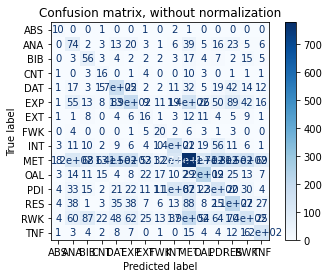

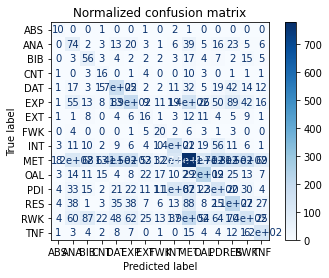

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logmodel, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

MULTINOMIAL

In [12]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         ABS       0.10      0.27      0.14        15
         ANA       0.11      0.08      0.10       216
         BIB       0.26      0.34      0.30       125
         CNT       0.11      0.22      0.15        41
         DAT       0.27      0.31      0.29       363
         EXP       0.60      0.05      0.10       761
         EXT       0.16      0.18      0.17        82
         FWK       0.12      0.33      0.18        45
         INT       0.27      0.27      0.27       299
         MET       0.41      0.74      0.53      2168
         OAL       0.58      0.44      0.50       416
         PDI       0.26      0.14      0.18       522
         RES       0.30      0.24      0.27       519
         RWK       0.35      0.02      0.05       903
         TNF       0.37      0.41      0.39       187

    accuracy                           0.36      6662
   macro avg       0.28      0.27      0.24      6662
weighted avg       0.38   

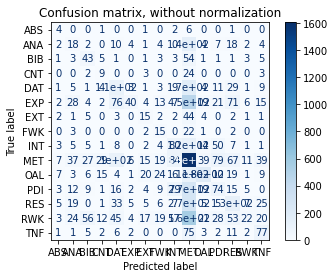

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

RANDOM FOREST

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
clf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',class_weight='balanced_subsample')

import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         ABS       0.26      0.33      0.29        15
         ANA       0.12      0.14      0.13       216
         BIB       0.16      0.25      0.19       125
         CNT       0.16      0.12      0.14        41
         DAT       0.19      0.23      0.21       363
         EXP       0.23      0.17      0.19       761
         EXT       0.17      0.07      0.10        82
         FWK       0.22      0.24      0.23        45
         INT       0.26      0.28      0.27       299
         MET       0.42      0.51      0.46      2168
         OAL       0.47      0.48      0.47       416
         PDI       0.14      0.12      0.13       522
         RES       0.21      0.23      0.22       519
         RWK       0.11      0.06      0.08       903
         TNF       0.37      0.42      0.39       187

    accuracy                           0.30      6662
   macro avg       0.23      0.24      0.23      6662
weighted avg       0.28   

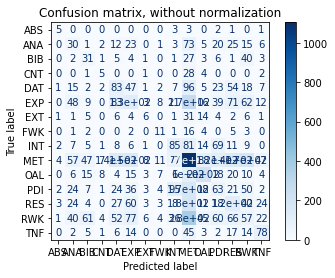

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

SVM

In [0]:
from sklearn import svm
from sklearn.model_selection import train_test_split
# Make a decision tree and train
clf = svm.SVC(class_weight='balanced',decision_function_shape='ovo')
import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

SGD

In [0]:

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

DECISION TREE

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()